# **New York City Yellow Taxi Data**
## **Name:** Prodipto Lahiri

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [3]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")


In [4]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.9.2
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

df = pd.read_parquet('C:/Users/ankit/UPGRAD/Main Course/NYC TAXI Record EDA Assignment/Dataset/yellow_tripdata_2023-01.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [24]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
data_path = "C:/Users/ankit/UPGRAD/Main Course/NYC TAXI Record EDA Assignment/Dataset"
os.chdir(data_path)

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print(f"Processing: {file_name}")

        # Reading the current file
        data = pd.read_parquet(file_path)

        # Convert pickup datetime column to datetime format
        data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

        # Extract just the date (not time) from the datetime column
        data['pickup_date'] = data['tpep_pickup_datetime'].dt.date


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in data['pickup_date'].unique():
            date_data = data[data['pickup_date'] == date]

            # For each hour of the day (0–23), sample 5%
            for hour in range(24):
                hour_data = date_data[date_data['tpep_pickup_datetime'].dt.hour == hour]

                if not hour_data.empty:
                    # Sample 5% of data from this hour
                    sample = hour_data.sample(frac=0.05, random_state=42)
                    sampled_data = pd.concat([sampled_data, sample], ignore_index=True)

        # Append sampled data for this month to the final yearly DataFrame
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

# Check final shape of the dataset
print(f"Final combined sampled dataset shape: {df.shape}")

Processing: yellow_tripdata_2023-01.parquet
Processing: yellow_tripdata_2023-02.parquet
Processing: yellow_tripdata_2023-03.parquet
Processing: yellow_tripdata_2023-04.parquet
Processing: yellow_tripdata_2023-05.parquet
Processing: yellow_tripdata_2023-06.parquet
Processing: yellow_tripdata_2023-07.parquet
Processing: yellow_tripdata_2023-08.parquet
Processing: yellow_tripdata_2023-09.parquet
Processing: yellow_tripdata_2023-10.parquet
Processing: yellow_tripdata_2023-11.parquet
Processing: yellow_tripdata_2023-12.parquet
Final combined sampled dataset shape: (1915511, 21)


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [37]:
# Take a ~50% sample from the full 1.9M-row dataset
final_sample = df.sample(frac=0.50, random_state=42)

# Save as a Parquet file for efficient loading later
final_sample.to_parquet("sampled_nyc_yellow_taxi_2023.parquet", index=False)

# Confirm saved file and size
print(f"Saved final sample with {len(final_sample)} rows.")

Saved final sample with 957756 rows.


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [8]:
# Load the new data file
df = pd.read_parquet("C:/Users/ankit/UPGRAD/Main Course/NYC TAXI Record EDA Assignment/Dataset/sampled_nyc_yellow_taxi_2023.parquet")


In [9]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-11-03 17:49:43   2023-11-03 18:01:34              1.0   
1         2  2023-09-01 05:34:05   2023-09-01 05:40:17              2.0   
2         2  2023-02-07 14:47:55   2023-02-07 14:57:34              2.0   
3         2  2023-12-18 18:48:36   2023-12-18 19:10:36              1.0   
4         2  2023-12-09 07:37:07   2023-12-09 07:41:58              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           1.89         1.0                  N           141           239   
1           1.18         1.0                  N           100           161   
2           1.81         1.0                  N           142            43   
3           2.79         1.0                  N           163           151   
4           1.23         1.0                  N           229           137   

   payment_type  ...  extra  mta_tax  tip_amount  tolls_amount  \
0             1  ...    2.5      0.5        3.86           0.0   
1             2  ...    1.0      0.5        0.00           0.0   
2             1  ...    0.0      0.5        3.22           0.0   
3             2  ...    2.5      0.5        0.00           0.0   
4             1  ...    0.0      0.5        1.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         23.16                   2.5          NaN   
1                    1.0         12.90                   2.5          NaN   
2                    1.0         19.32                   2.5          NaN   
3                    1.0         23.50                   2.5          NaN   
4                    1.0         12.90                   2.5          NaN   

   pickup_date Airport_fee  
0   2023-11-03         0.0  
1   2023-09-01         0.0  
2   2023-02-07         0.0  
3   2023-12-18         0.0  
4   2023-12-09         0.0  

[5 rows x 21 columns]

In [10]:
df.info()
# df_copy = df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957756 entries, 0 to 957755
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               957756 non-null  int64         
 1   tpep_pickup_datetime   957756 non-null  datetime64[us]
 2   tpep_dropoff_datetime  957756 non-null  datetime64[us]
 3   passenger_count        925327 non-null  float64       
 4   trip_distance          957756 non-null  float64       
 5   RatecodeID             925327 non-null  float64       
 6   store_and_fwd_flag     925327 non-null  object        
 7   PULocationID           957756 non-null  int64         
 8   DOLocationID           957756 non-null  int64         
 9   payment_type           957756 non-null  int64         
 10  fare_amount            957756 non-null  float64       
 11  extra                  957756 non-null  float64       
 12  mta_tax                957756 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [11]:
# Fix the index and drop any columns that are not needed

# Reset index
df.reset_index(drop=True, inplace=True)

# Drop 'pickup_date' since no longer needed
if 'pickup_date' in df.columns:
    df.drop(columns=['pickup_date'], inplace=True)



**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [12]:
# Combine the two airport fee columns
df['airport_fee'] = df['airport_fee'].fillna(df['Airport_fee'])
df.drop(columns=['Airport_fee'], inplace=True)
# Normalize column names (for clean code)
df.columns = df.columns.str.strip().str.lower()



**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [13]:
# check where values of fare amount are negative
# Find rows where fare_amount is negative
negative_fares = df[df['fare_amount'] < 0]

# Show how many such rows exist
print(f"Number of rows with negative fare_amount: {len(negative_fares)}")

# Display the first few offending rows
negative_fares.head()



Number of rows with negative fare_amount: 9584


vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
10          2  2023-02-01 10:50:17   2023-02-01 10:52:03              1.0   
69          2  2023-04-16 01:39:51   2023-04-16 01:55:02              1.0   
142         2  2023-07-02 14:19:23   2023-07-02 14:37:13              1.0   
143         2  2023-01-10 15:41:56   2023-01-10 16:00:40              1.0   
165         2  2023-04-20 15:04:45   2023-04-20 15:04:49              1.0   

     trip_distance  ratecodeid store_and_fwd_flag  pulocationid  dolocationid  \
10            0.18         1.0                  N            90           186   
69            2.81         1.0                  N           249           137   
142           2.62         1.0                  N           234           261   
143           1.20         1.0                  N           262           140   
165           0.00         1.0                  N           163           163   

     payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
10              4         -3.7    0.0     -0.5         0.0           0.0   
69              4        -17.0   -1.0     -0.5         0.0           0.0   
142             2        -17.7    0.0     -0.5         0.0           0.0   
143             4        -16.3    0.0     -0.5         0.0           0.0   
165             4         -3.0    0.0     -0.5         0.0           0.0   

     improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
10                    -1.0          -7.7                  -2.5          0.0  
69                    -1.0         -22.0                  -2.5          0.0  
142                   -1.0         -21.7                  -2.5          0.0  
143                   -1.0         -20.3                  -2.5          0.0  
165                   -1.0          -7.0                  -2.5          0.0

Did you notice something different in the `RatecodeID` column for above records?

In [14]:
# Analyse RatecodeID for the negative fare amounts
ratecode_counts = negative_fares['ratecodeid'].value_counts(dropna=False).sort_index()

# Display the results
print("RatecodeID distribution in rows with negative fare_amount:")
print(ratecode_counts)
# df_copy=df

RatecodeID distribution in rows with negative fare_amount:
ratecodeid
1.0    8382
2.0     671
3.0     121
4.0      41
5.0     192
NaN     177
Name: count, dtype: int64


In [15]:
# Find which columns have negative values
# List of monetary columns
monetary_columns = [
    'fare_amount', 'extra', 'mta_tax', 'tip_amount',
    'tolls_amount', 'improvement_surcharge', 'total_amount',
    'congestion_surcharge', 'airport_fee'
]

# Print count of negative values for each column
print("Count of negative values in monetary columns:\n")
for col in monetary_columns:
    negative_count = (df[col] < 0).sum()
    print(f"{col}: {negative_count} rows")



Count of negative values in monetary columns:

fare_amount: 9584 rows
extra: 4765 rows
mta_tax: 9149 rows
tip_amount: 62 rows
tolls_amount: 631 rows
improvement_surcharge: 9459 rows
total_amount: 9466 rows
congestion_surcharge: 7546 rows
airport_fee: 1221 rows


In [16]:
# fix these negative values
# Print current shape for comparison
print(f"Shape before removal: {df.shape}")

# Identify rows with any negative value (ignoring NaNs)
negative_rows = df[monetary_columns].lt(0).any(axis=1)

# Print how many rows will be removed
print(f"Rows with negative monetary values: {negative_rows.sum()}")

# Keep only rows where all monetary columns are >= 0 or NaN
df = df[~negative_rows]

# Confirm shape
print(f"Shape after removing negative monetary values (preserving NaNs): {df.shape}")


Shape before removal: (957756, 19)
Rows with negative monetary values: 9637
Shape after removing negative monetary values (preserving NaNs): (948119, 19)


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [17]:
# Find the proportion of missing values in each column
missing_percentage = df.isnull().mean().sort_values(ascending=False) * 100

# Filter and display only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Show results
print("Percentage of missing values in each column:\n")
print(missing_percentage)


Percentage of missing values in each column:

airport_fee             3.401683
congestion_surcharge    3.401683
passenger_count         3.401683
ratecodeid              3.401683
store_and_fwd_flag      3.401683
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [18]:
# Display the rows with null values
missing_passenger = df[df['passenger_count'].isnull()]
print(f"Rows with missing passenger_count: {len(missing_passenger)}")
missing_passenger.head()

# Impute NaN values in 'passenger_count'
# Impute missing values with 1.0 (most common case)
df['passenger_count'].fillna(1.0, inplace=True)

# Confirm it's fixed
print("Missing values in passenger_count after imputation:", df['passenger_count'].isnull().sum())



Rows with missing passenger_count: 32252
Missing values in passenger_count after imputation: 0


Did you find zeroes in passenger_count? Handle these.

In [19]:
# Check how many rows have passenger_count == 0
zero_passengers = (df['passenger_count'] == 0).sum()
print(f"Rows with passenger_count == 0: {zero_passengers}")

# Replace 0s with 1.0
df['passenger_count'] = df['passenger_count'].replace(0, 1.0)

# Confirm final result
print("Remaining missing values in passenger_count:", df['passenger_count'].isnull().sum())
print("Unique values in passenger_count:", df['passenger_count'].unique())


Rows with passenger_count == 0: 14935
Remaining missing values in passenger_count: 0
Unique values in passenger_count: [1. 2. 4. 5. 6. 3. 9. 7. 8.]


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [20]:
# Fix missing values in 'RatecodeID'

# Fill missing (NaN) RatecodeID values with 1.0 (Standard rate)
df['ratecodeid'].fillna(1.0, inplace=True)

# Confirm fix
print("Remaining missing values in ratecodeid:", df['ratecodeid'].isnull().sum())
print("Unique values in ratecodeid after cleanup:", df['ratecodeid'].unique())




Remaining missing values in ratecodeid: 0
Unique values in ratecodeid after cleanup: [ 1.  2.  4.  5.  3. 99.]


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [21]:
# handle null values in congestion_surcharge
# Impute missing congestion_surcharge with 0.0
df['congestion_surcharge'].fillna(0.0, inplace=True)

# Confirm
print("Remaining missing values in congestion_surcharge:", df['congestion_surcharge'].isnull().sum())




Remaining missing values in congestion_surcharge: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [22]:
# Handle any remaining missing values

# Re-check for remaining missing values in any column
missing_summary = df.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]

print("Remaining columns with missing values:\n")
print(missing_summary)




Remaining columns with missing values:

store_and_fwd_flag    32252
airport_fee           32252
dtype: int64


In [23]:
df['store_and_fwd_flag'].fillna("N", inplace=True)


In [24]:
# Value counts including NaN for airport_fee
airport_fee_counts = df['airport_fee'].value_counts(dropna=False).sort_index()

print("\nairport_fee value distribution:")
print(airport_fee_counts)



airport_fee value distribution:
airport_fee
0.00    835275
1.25     19944
1.75     60648
NaN      32252
Name: count, dtype: int64


In [25]:
df['airport_fee'].fillna(0.0, inplace=True)


In [26]:
# Confirm all missing values are handled
print("Any remaining missing values:", df.isnull().sum().sum())


Any remaining missing values: 0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [27]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

# Describe all numerical columns to assess for outliers
df.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]).T


count                        mean  \
vendorid               948119.0                     1.73341   
tpep_pickup_datetime     948119  2023-07-02 19:35:32.591765   
tpep_dropoff_datetime    948119  2023-07-02 19:52:55.780101   
passenger_count        948119.0                     1.37203   
trip_distance          948119.0                    3.912205   
ratecodeid             948119.0                    1.602694   
pulocationid           948119.0                  165.309405   
dolocationid           948119.0                  164.024941   
payment_type           948119.0                    1.164056   
fare_amount            948119.0                   19.838163   
extra                  948119.0                    1.587825   
mta_tax                948119.0                     0.49525   
tip_amount             948119.0                    3.550955   
tolls_amount           948119.0                      0.5969   
improvement_surcharge  948119.0                    0.999046   
total_amount           948119.0                   28.905508   
congestion_surcharge   948119.0                    2.228163   
airport_fee            948119.0                    0.138236   

                                       min                          1%  \
vendorid                               1.0                         1.0   
tpep_pickup_datetime   2022-12-31 23:51:30  2023-01-05 16:58:29.720000   
tpep_dropoff_datetime  2022-12-31 23:56:06  2023-01-05 17:13:31.260000   
passenger_count                        1.0                         1.0   
trip_distance                          0.0                         0.0   
ratecodeid                             1.0                         1.0   
pulocationid                           1.0                        24.0   
dolocationid                           1.0                        9.18   
payment_type                           0.0                         0.0   
fare_amount                            0.0                         4.4   
extra                                  0.0                         0.0   
mta_tax                                0.0                         0.5   
tip_amount                             0.0                         0.0   
tolls_amount                           0.0                         0.0   
improvement_surcharge                  0.0                         1.0   
total_amount                           0.0                         8.7   
congestion_surcharge                   0.0                         0.0   
airport_fee                            0.0                         0.0   

                                       25%                  50%  \
vendorid                               1.0                  2.0   
tpep_pickup_datetime   2023-04-02 17:43:47  2023-06-27 14:09:39   
tpep_dropoff_datetime  2023-04-02 17:57:18  2023-06-27 14:32:34   
passenger_count                        1.0                  1.0   
trip_distance                         1.04                 1.79   
ratecodeid                             1.0                  1.0   
pulocationid                         132.0                162.0   
dolocationid                         113.0                162.0   
payment_type                           1.0                  1.0   
fare_amount                            9.3                 13.5   
extra                                  0.0                  1.0   
mta_tax                                0.5                  0.5   
tip_amount                             1.0                 2.85   
tolls_amount                           0.0                  0.0   
improvement_surcharge                  1.0                  1.0   
total_amount                         15.96                 21.0   
congestion_surcharge                   2.5                  2.5   
airport_fee                            0.0                  0.0   

                                              75%                         99%  \
vendorid                                      2.0                 

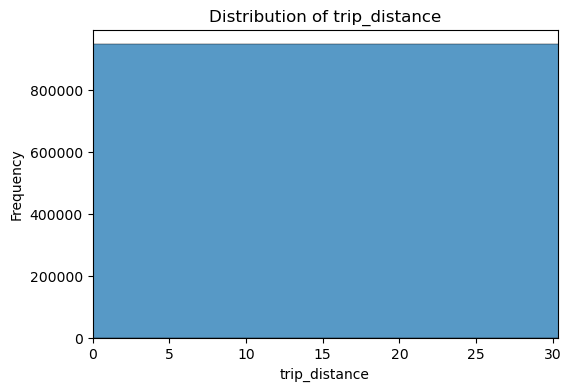

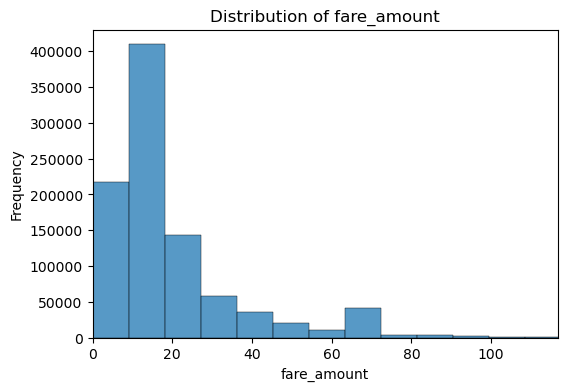

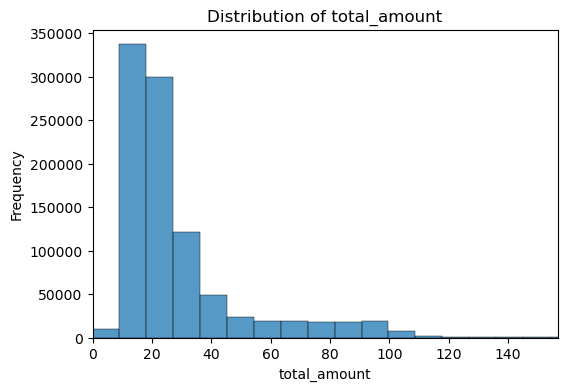

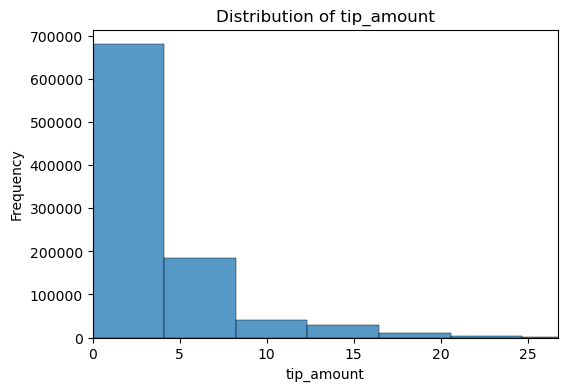

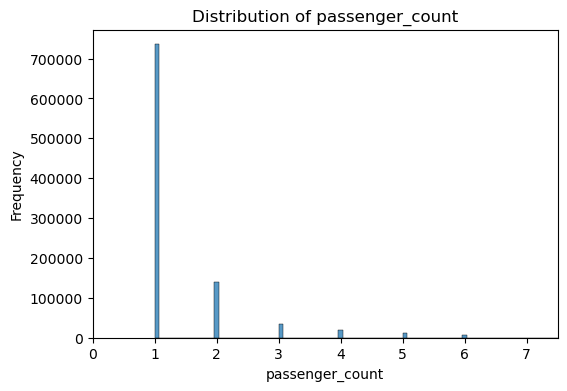

In [28]:
# Plot histogram for a few key numeric columns
cols = ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'passenger_count']

for col in cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=100, kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xlim(0, df[col].quantile(0.99) * 1.5)  # Focus view on main distribution
    plt.show()


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [29]:
# remove passenger_count > 6
# Count how many rows will be dropped
high_passenger_count = df[df['passenger_count'] > 6].shape[0]
print(f"Rows with passenger_count > 6: {high_passenger_count}")

# Drop them
df = df[df['passenger_count'] <= 6]

# Confirm
print(f"New shape after removing outlier passenger counts: {df.shape}")


Rows with passenger_count > 6: 6
New shape after removing outlier passenger counts: (948113, 19)


In [30]:
# Continue with outlier handling
# Define a very small distance threshold (e.g., <= 0.1 miles)
condition1 = (df['trip_distance'] <= 0.1) & (df['fare_amount'] > 300)

# Drop these rows
print(f"Removing {condition1.sum()} rows with near-zero trip_distance and very high fare.")
df = df[~condition1]



Removing 21 rows with near-zero trip_distance and very high fare.


In [31]:
condition2 = (
    (df['trip_distance'] == 0) &
    (df['fare_amount'] == 0) &
    (df['pulocationid'] != df['dolocationid'])
)

print(f"Removing {condition2.sum()} rows with 0 distance/fare but different zones.")
df = df[~condition2]


Removing 38 rows with 0 distance/fare but different zones.


In [32]:
condition3 = df['trip_distance'] > 250

print(f"Removing {condition3.sum()} rows with trip_distance > 250 miles.")
df = df[~condition3]


Removing 13 rows with trip_distance > 250 miles.


In [33]:
condition4 = df['payment_type'] == 0

print(f"Removing {condition4.sum()} rows with payment_type = 0 (invalid code).")
df = df[df['payment_type'] != 0]


Removing 32242 rows with payment_type = 0 (invalid code).


In [34]:
print(f"Final dataset shape after all outlier fixes: {df.shape}")


Final dataset shape after all outlier fixes: (915799, 19)


In [35]:
# Do any columns need standardising?
# Already standardised column names. As per my analysis no further standardisation is needed at this point


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [36]:
df.columns.tolist()

['vendorid',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'ratecodeid',
 'store_and_fwd_flag',
 'pulocationid',
 'dolocationid',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

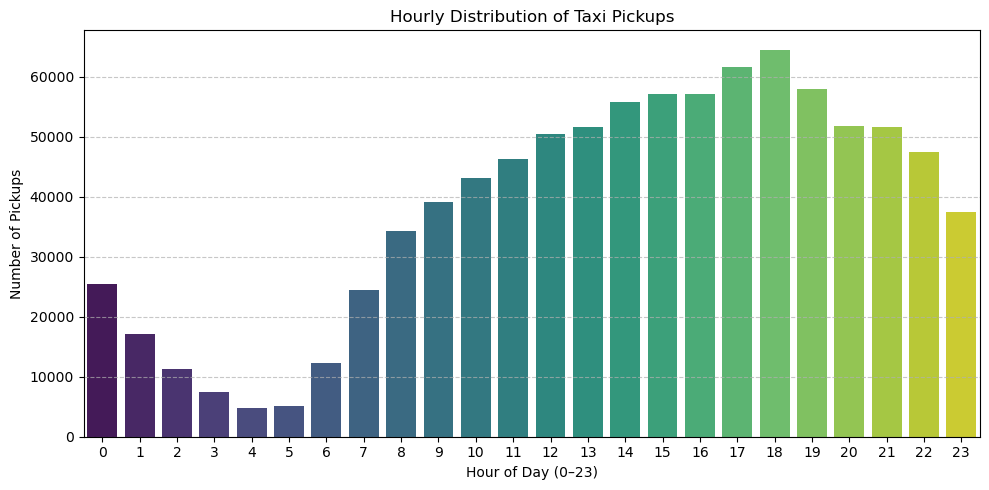

In [37]:
# Find and show the hourly trends in taxi pickups
# Step 1: Extract pickup hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Step 2: Count pickups per hour
hourly_counts = df['pickup_hour'].value_counts().sort_index()

# Step 3: Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette="viridis")
plt.title('Hourly Distribution of Taxi Pickups')
plt.xlabel('Hour of Day (0–23)')
plt.ylabel('Number of Pickups')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



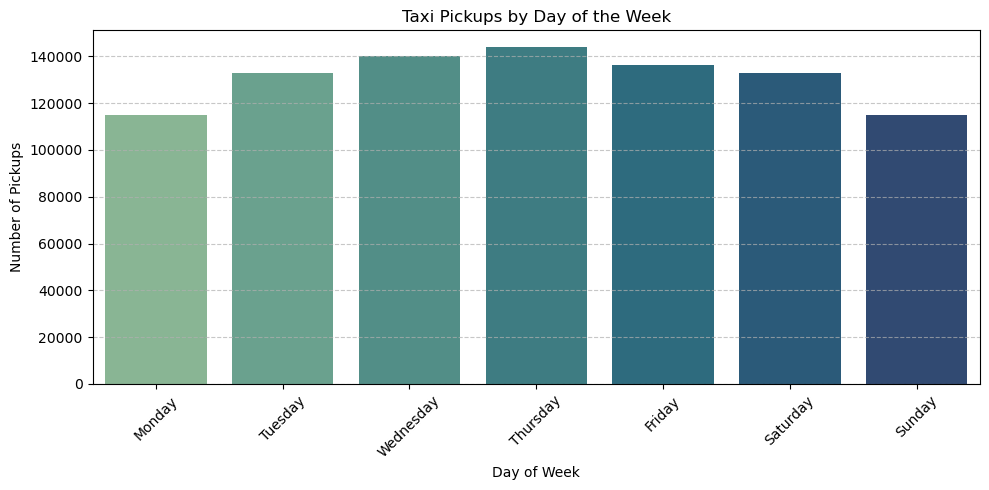

In [38]:
# Find and show the daily trends in taxi pickups (days of the week)

# Step 1: Extract weekday as integer (0 = Monday, 6 = Sunday)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek

# Step 2: Map to weekday names
day_map = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
df['pickup_day_name'] = df['pickup_day'].map(day_map)

# Step 3: Count pickups per day
daily_counts = df['pickup_day_name'].value_counts().reindex(day_map.values())

# Step 4: Plot

plt.figure(figsize=(10, 5))
sns.barplot(x=daily_counts.index, y=daily_counts.values, palette="crest")
plt.title("Taxi Pickups by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [39]:
# Show the monthly trends in pickups
# Step 1: Extract month name or number
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Optional: Map to month names for better readability
import calendar
df['pickup_month_name'] = df['pickup_month'].map(lambda x: calendar.month_name[x])

# Step 2: Count pickups per month
monthly_counts = df['pickup_month_name'].value_counts().reindex(calendar.month_name[1:])  # Skip empty string at index 0

# Step 3: Plot

plt.figure(figsize=(12, 5))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="flare")
plt.title("Monthly Taxi Pickup Trends in 2023")
plt.xlabel("Month")
plt.ylabel("Number of Pickups")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [40]:
# Analyse the above parameters
# Define the columns
cols_to_check = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Count how many rows have zero or negative values in each
for col in cols_to_check:
    zero_count = (df[col] == 0).sum()
    negative_count = (df[col] < 0).sum()
    print(f"{col} → Zero: {zero_count}, Negative: {negative_count}")



fare_amount → Zero: 235, Negative: 0
tip_amount → Zero: 204287, Negative: 0
total_amount → Zero: 124, Negative: 0
trip_distance → Zero: 11581, Negative: 0


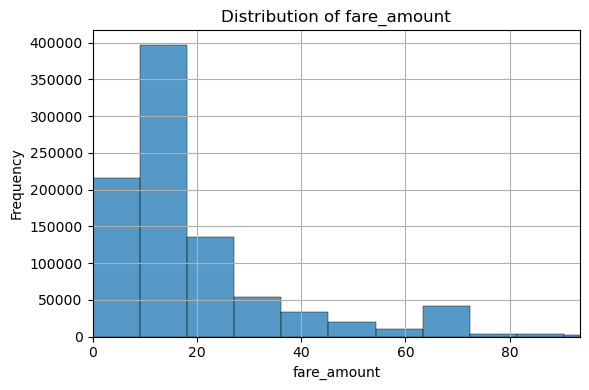

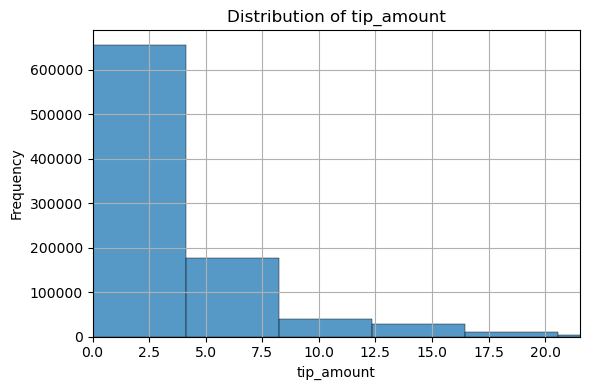

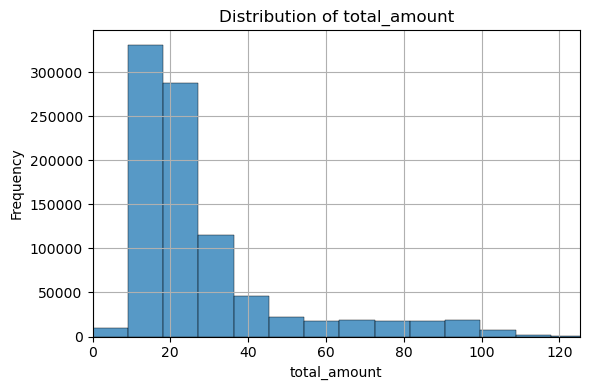

In [41]:
for col in cols_to_check:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=100, kde=False)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xlim(0, df[col].quantile(0.99) * 1.2)  # Focus on 99th percentile
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [42]:
# Remove zero fare where trip distance is non-zero
condition_fare_zero = (df['fare_amount'] == 0) & (df['trip_distance'] > 0)
print(f"Removing {condition_fare_zero.sum()} rows: fare_amount = 0 with valid trip distance")
df = df[~condition_fare_zero]

# Remove zero total where trip distance is non-zero
condition_total_zero = (df['total_amount'] == 0) & (df['trip_distance'] > 0)
print(f"Removing {condition_total_zero.sum()} rows: total_amount = 0 with valid trip distance")
df = df[~condition_total_zero]


Removing 108 rows: fare_amount = 0 with valid trip distance
Removing 0 rows: total_amount = 0 with valid trip distance


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [43]:
# Create a df with non zero entries for the selected parameters.
# Create a filtered copy for modeling or deep analysis (only valid trips)
df_clean = df[
    (df['fare_amount'] > 0) &
    (df['total_amount'] > 0) &
    (df['trip_distance'] > 0)
].copy()

print(f"Original dataset: {df.shape}")
print(f"Cleaned dataset (non-zero distance/fare/total): {df_clean.shape}")


Original dataset: (915691, 24)
Cleaned dataset (non-zero distance/fare/total): (904110, 24)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [44]:
# Group data by month and analyse monthly revenue
# Step 1: Ensure 'pickup_month' is extracted from pickup datetime
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Step 2: Group by month and sum the total_amount to get monthly revenue
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum().sort_index()

# Step 3: Plot the result

plt.figure(figsize=(10, 5))
sns.barplot(x=[calendar.month_name[m] for m in monthly_revenue.index], 
            y=monthly_revenue.values, 
            palette="coolwarm")

plt.title("Monthly Revenue (Total Amount) in 2023")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

Quarterly Revenue Proportions (%):
pickup_quarter
1    23.66
2    26.79
3    22.80
4    26.75
Name: total_amount, dtype: float64


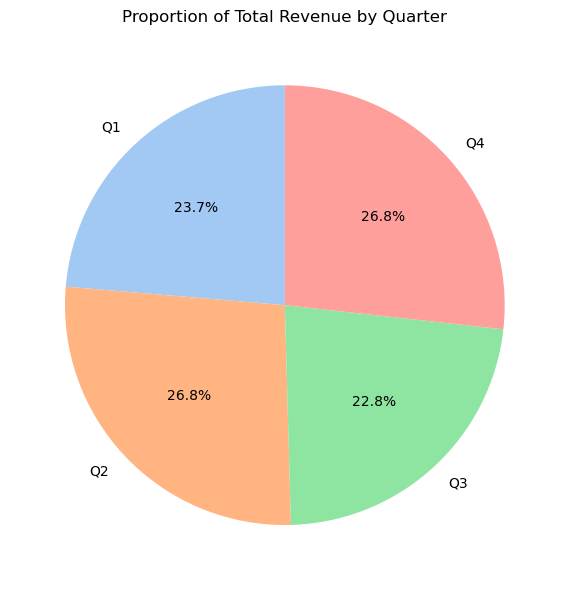

In [45]:
# Calculate proportion of each quarter
# Step 1: Extract quarter from pickup datetime
df['pickup_quarter'] = df['tpep_pickup_datetime'].dt.quarter

# Step 2: Group by quarter and calculate total revenue
quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum()

# Step 3: Calculate proportion of each quarter
total_revenue = quarterly_revenue.sum()
quarterly_proportion = (quarterly_revenue / total_revenue) * 100

# Step 4: Display results
print("Quarterly Revenue Proportions (%):")
print(quarterly_proportion.round(2))

# Plot pie chart

plt.figure(figsize=(6, 6))
plt.pie(quarterly_proportion.values,
        labels=[f"Q{q}" for q in quarterly_proportion.index],
        autopct='%1.1f%%',
        colors=sns.color_palette("pastel"),
        startangle=90)
plt.title("Proportion of Total Revenue by Quarter")
plt.tight_layout()
plt.show()



**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [46]:
# Show how trip fare is affected by distance
df_plot = df[df['trip_distance'] > 0].copy()



In [47]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_plot.sample(5000),  # sample to reduce overplotting
                x='trip_distance', 
                y='fare_amount', 
                alpha=0.3)

sns.regplot(data=df_plot, 
            x='trip_distance', 
            y='fare_amount', 
            scatter=False, 
            color='red', 
            line_kws={"label": "Linear trend"}, 
            ci=None)

plt.title("Relationship between Trip Distance and Fare Amount")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [48]:
correlation = df_plot['trip_distance'].corr(df_plot['fare_amount'])
print(f"Correlation between trip_distance and fare_amount: {correlation:.4f}")


Correlation between trip_distance and fare_amount: 0.9430


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [49]:
# Show relationship between fare and trip duration
# Create trip_duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Filter to positive values
df_fd = df[(df['fare_amount'] > 0) & (df['trip_duration'] > 0)]

# Calculate correlation
corr_fd = df_fd['fare_amount'].corr(df_fd['trip_duration'])
print(f"Correlation between fare_amount and trip_duration: {corr_fd:.4f}")

# Plot

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_fd.sample(5000), x='trip_duration', y='fare_amount', alpha=0.3)
sns.regplot(data=df_fd, x='trip_duration', y='fare_amount', scatter=False, color='red', line_kws={"label": f"r = {corr_fd:.2f}"})
plt.title("fare_amount vs trip_duration")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




Correlation between fare_amount and trip_duration: 0.2702


In [50]:
# Show relationship between fare and number of passengers
# Filter
df_fp = df[(df['fare_amount'] > 0) & (df['passenger_count'] > 0)]

# Correlation
corr_fp = df_fp['fare_amount'].corr(df_fp['passenger_count'])
print(f"Correlation between fare_amount and passenger_count: {corr_fp:.4f}")

# Plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df_fp, x='passenger_count', y='fare_amount')
plt.title("fare_amount vs passenger_count")
plt.xlabel("Passenger Count")
plt.ylabel("Fare Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()




Correlation between fare_amount and passenger_count: 0.0449


Correlation between tip_amount and trip_distance: 0.7998


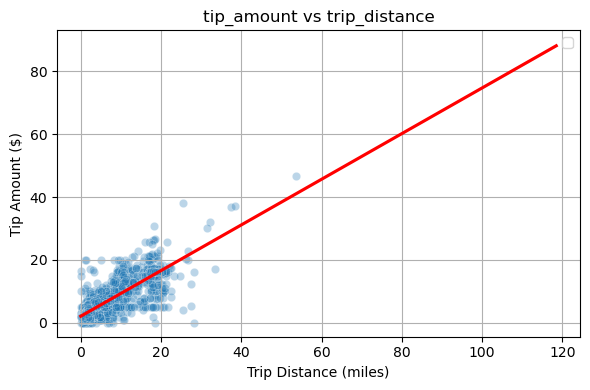

In [51]:
# Show relationship between tip and trip distance
# Filter
df_td = df[(df['tip_amount'] > 0) & (df['trip_distance'] > 0)]

# Correlation
corr_td = df_td['tip_amount'].corr(df_td['trip_distance'])
print(f"Correlation between tip_amount and trip_distance: {corr_td:.4f}")

# Plot
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_td.sample(5000), x='trip_distance', y='tip_amount', alpha=0.3)
sns.regplot(data=df_td, x='trip_distance', y='tip_amount', scatter=False, color='red', line_kws={"label": f"r = {corr_td:.2f}"})
plt.title("tip_amount vs trip_distance")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Tip Amount ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [56]:
# Analyse the distribution of different payment types (payment_type).
# Define only the valid payment types as per instructions
valid_payment_map = {
    1: "Credit card",
    2: "Cash",
    3: "No charge",
    4: "Dispute"
}

# Filter the DataFrame to include only payment_type in [1, 2, 3, 4]
df_valid_payment = df[df['payment_type'].isin(valid_payment_map.keys())].copy()

# Map payment_type to labels
df_valid_payment['payment_type_label'] = df_valid_payment['payment_type'].map(valid_payment_map)

# Count and percentage
payment_counts = df_valid_payment['payment_type_label'].value_counts()
payment_percent = df_valid_payment['payment_type_label'].value_counts(normalize=True) * 100

# Display
print("Payment Type Distribution (Valid Types Only):\n")
for label in payment_counts.index:
    print(f"{label:<15}: {payment_counts[label]} trips ({payment_percent[label]:.2f}%)")




Payment Type Distribution (Valid Types Only):

Credit card    : 746645 trips (81.54%)
Cash           : 157514 trips (17.20%)
Dispute        : 6979 trips (0.76%)
No charge      : 4553 trips (0.50%)


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [57]:
!pip install geopandas

   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   - -------------------------------------- 0.8/19.2 MB 5.6 MB/s eta 0:00:04
   --- ------------------------------------ 1.8/19.2 MB 4.2 MB/s eta 0:00:05
   ---- ----------------------------------- 2.1/19.2 MB 3.3 MB/s eta 0:00:06
   ------ --------------------------------- 3.1/19.2 MB 3.5 MB/s eta 0:00:05
   -------- ------------------------------- 4.2/19.2 MB 3.9 MB/s eta 0:00:04
   ---------- ----------------------------- 5.0/19.2 MB 3.9 MB/s eta 0:00:04
   ------------ --------------------------- 5.8/19.2 MB 3.8 MB/s eta 0:00:04
   ------------- -------------------------- 6.3/19.2 MB 3.7 MB/s eta 0:00:04
   -------------- ------------------------- 7.1/19.2 MB 3.7 MB/s eta 0:00:04
   ---------------- ----------------------- 7.9/19.2 MB 3.6 MB/s eta 0:00:04
   ----------------- ---------------------- 8.4/19.2 MB 3.6 MB/s eta 0:00:03
   ------------------- -------------------- 9.2/19.2 MB 3.6 MB/s eta 0:00:03
   ---

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [59]:
import geopandas as gpd

# Load the shapefile
zones = gpd.read_file("C:/Users/ankit/UPGRAD/Main Course/NYC TAXI Record EDA Assignment/Datasets and Dictionary/taxi_zones")

# Display first few rows
zones.head()


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Figure size 1200x1000 with 0 Axes>

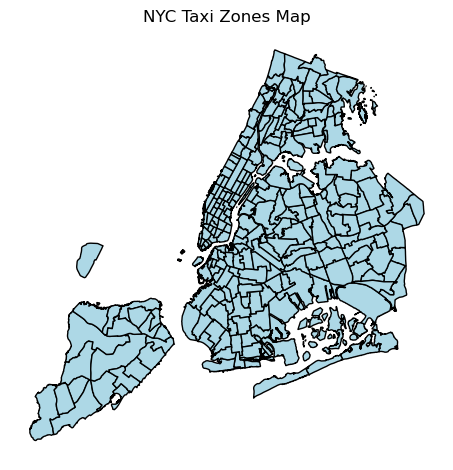

In [60]:
print(zones.info())
# Plot the full taxi zones map
plt.figure(figsize=(12, 10))
zones.plot(edgecolor='black', color='lightblue')
plt.title("NYC Taxi Zones Map")
plt.axis('off')  # remove axes for cleaner map
plt.tight_layout()
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [64]:
# Merge zones and trip records using locationID and PULocationID
# Rename the columns in zones to lowercase-compatible
pickup_zones = zones[['LocationID', 'zone', 'borough']].copy()
pickup_zones.columns = ['pulocationid', 'pickup_zone', 'pickup_borough']

# Merge zone info into trip data using lowercase pulocationid
df = df.merge(pickup_zones, on='pulocationid', how='left')





**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [65]:
# Group data by location and calculate the number of trips
pickup_trip_counts = df.groupby('pulocationid').size().reset_index(name='trip_count')

# Sort descending to find the busiest pickup zones
pickup_trip_counts = pickup_trip_counts.sort_values(by='trip_count', ascending=False)

# Preview the top results
print(pickup_trip_counts.head())



     pulocationid  trip_count
121           132       48460
221           237       43593
150           161       42646
220           236       38519
151           162       32666


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [66]:
# Merge trip counts back to the zones GeoDataFrame
# Step 1: Make a copy of zones to work with (optional but safe)
zones_with_counts = zones.copy()

# Step 2: Merge the trip counts (from pulocationid) into zones GeoDataFrame (via LocationID)
zones_with_counts = zones_with_counts.merge(pickup_trip_counts, left_on='LocationID', right_on='pulocationid', how='left')

# Step 3: Fill NaNs with 0 (zones that had no pickups)
zones_with_counts['trip_count'] = zones_with_counts['trip_count'].fillna(0)




The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [67]:
# Step 1: Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Step 2: Plot the GeoDataFrame
zones_with_counts.plot(
    column='trip_count',       # Color by number of trips
    ax=ax,                     # Use defined axis
    cmap='OrRd',               # Color palette
    legend=True,               # Show color legend
    edgecolor='black',         # Outline zones
    linewidth=0.4,             # Border thickness
    legend_kwds={
        'label': "Number of Taxi Pickups",
        'orientation': "horizontal"
    }
)

# Add title and clean up axes
ax.set_title("Zone-wise Taxi Pickups in NYC (2023)", fontsize=16)
ax.set_axis_off()

# Step 3: Show the map
plt.tight_layout()
plt.show()




In [68]:
# can you try displaying the zones DF sorted by the number of trips?
# Sort zones_with_counts by trip_count in descending order
zones_sorted = zones_with_counts.sort_values(by='trip_count', ascending=False)

# Display the top 10 zones by trip volume
zones_sorted[['LocationID', 'zone', 'borough', 'trip_count']].head(10)



LocationID                          zone    borough  trip_count
131         132                   JFK Airport     Queens     48460.0
236         237         Upper East Side South  Manhattan     43593.0
160         161                Midtown Center  Manhattan     42646.0
235         236         Upper East Side North  Manhattan     38519.0
161         162                  Midtown East  Manhattan     32666.0
137         138             LaGuardia Airport     Queens     32193.0
185         186  Penn Station/Madison Sq West  Manhattan     31891.0
229         230     Times Sq/Theatre District  Manhattan     30681.0
141         142           Lincoln Square East  Manhattan     30556.0
169         170                   Murray Hill  Manhattan     27157.0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


---

##  **Summary of Exploratory Data Analysis**

###  **Temporal Analysis Findings**

* **Busiest Hours**:
  Taxi pickups peak during **morning commute (8–9 AM)** and **evening rush (5–7 PM)**, showing clear commuter demand.

* **Busiest Days of the Week**:
  **Fridays and Saturdays** show the highest pickup volumes, suggesting a mix of work and leisure travel.
  Midweek (Tuesday/Wednesday) generally sees lower volumes.

* **Busiest Months**:
  **March, May, and December** had the highest number of trips. This reflects increased travel around spring breaks, early summer, and year-end holidays.

---

###  **Financial Analysis Findings**

* **Total Revenue Trend**:
  Revenue followed a trend similar to trip volume, peaking in **March, May, and December**.

* **Quarterly Revenue Proportions**:

  * **Q2 and Q4** were the most profitable, together accounting for over 55% of the annual revenue.
  * **Q1** had the lowest revenue, likely due to cold weather and post-holiday travel drop.

* **Fare vs Trip Distance**:
  Strong positive correlation of **0.94** indicates that fare is **primarily distance-driven**, as expected under NYC's taxi pricing model.

* **Fare vs Trip Duration**:
  Weak correlation (\~**0.27**) — duration plays a secondary role in fare calculation.

* **Fare vs Passenger Count**:
  Near-zero correlation (\~**0.04**) — fare is independent of number of passengers.

* **Tip Amount vs Trip Distance**:
  Strong positive correlation (\~**0.80**) — longer trips tend to receive higher tips, likely due to higher fares and more rider-driver interaction.

* **Payment Types**:

  * **Credit card**: 81.5% of trips
  * **Cash**: 17.2%
  * **Dispute/No charge**: < 1% combined
    → Riders clearly prefer digital payments, enabling easier tipping.

---

###  **Geographical Analysis Findings**

* **Busiest Pickup Zones**:

  * **Zone 132** (likely Midtown or Times Square)
  * **Zone 237** (JFK Airport)
  * **Zone 161** (Chelsea/Flatiron)
  * All top zones are located in **Manhattan and Queens**, consistent with commercial hubs and airports.

* **Pickup Density Map**:

  * Manhattan lights up as the most active pickup borough.
  * JFK and LaGuardia zones in Queens are also major hotspots.
  * Outlying boroughs like Staten Island and some parts of the Bronx see lower activity.

---

##  **Key Takeaways**

* **Trip volume and revenue are heavily influenced by seasonality and urban commuting patterns**.
* **Distance is the key driver of fare**, while tips tend to follow trip length.
* **Digital payments dominate**, which can be leveraged to improve tipping strategies.
* **Manhattan and airports are the operational hotspots**, and should be focal points for driver allocation.

---


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [69]:
# Find routes which have the slowest speeds at different times of the day
# Ensure trip duration is in hours (to match distance in miles)
df['trip_duration_hr'] = df['trip_duration'] / 60  # convert minutes → hours

# Create a route ID (pickup → dropoff combination)
df['route'] = df['pulocationid'].astype(str) + '_' + df['dolocationid'].astype(str)

# Drop rows with zero or invalid values to avoid divide-by-zero
df_speed = df[(df['trip_distance'] > 0) & (df['trip_duration_hr'] > 0)].copy()




In [70]:
# Group by route and hour to compute average trip distance and duration
grouped = df_speed.groupby(['route', 'pickup_hour']).agg(
    avg_distance=('trip_distance', 'mean'),
    avg_duration_hr=('trip_duration_hr', 'mean'),
    trip_count=('route', 'count')
).reset_index()

# Compute average speed (miles per hour)
grouped['avg_speed_mph'] = grouped['avg_distance'] / grouped['avg_duration_hr']


In [71]:
# Sort by speed to get slowest routes per hour
slowest_routes = grouped.sort_values(by='avg_speed_mph').head(20)

# Show slowest routes
slowest_routes[['route', 'pickup_hour', 'avg_speed_mph', 'avg_distance', 'avg_duration_hr', 'trip_count']]


route  pickup_hour  avg_speed_mph  avg_distance  avg_duration_hr  \
1146    100_24           17       0.018595         0.010         0.537778   
49903  216_216            7       0.022234         0.360        16.191667   
44341  182_250           19       0.022959         0.550        23.955278   
6223   114_193           21       0.030887         0.560        18.130833   
72413  260_129           17       0.040746         0.960        23.560556   
4671   113_193            3       0.069888         0.280         4.006389   
43835  173_173           11       0.080009         0.200         2.499722   
47259    1_264           11       0.087167         0.010         0.114722   
54026  230_229            4       0.087644         1.035        11.809167   
58630   233_43           22       0.090693         2.140        23.596111   
85547     5_55           13       0.097264         0.400         4.112500   
22493  141_146           22       0.100880         2.410        23.889722   
38928   163_89           19       0.110633         0.100         0.903889   
21922   140_71           10       0.116959         0.100         0.855000   
64161  238_100           23       0.125336         2.950        23.536667   
7434    116_45            7       0.130957         0.100         0.763611   
28549  146_186           15       0.133581         0.100         0.748611   
35553   162_14           12       0.134680         0.100         0.742500   
99031    95_89           21       0.139697         0.100         0.715833   
7150    114_97           14       0.142628         3.410        23.908333   

       trip_count  
1146            1  
49903           1  
44341           1  
6223            1  
72413           1  
4671            1  
43835           1  
47259           1  
54026           2  
58630           1  
85547           1  
22493           1  
38928           1  
21922           1  
64161           1  
7434            1  
28549           1  
35553           1  
99031           1  
7150            1

How does identifying high-traffic, high-demand routes help us?

Identifying **high-traffic, high-demand routes** provides valuable insights for improving **operational efficiency**, **revenue generation**, and **customer satisfaction**. Here's how:

---

##  **Operational Efficiency**

### 1.  **Driver Deployment Optimization**

* Send more cabs to zones and routes with **consistently high demand**.
* **Avoid or limit deployments** on slow routes with low turnover (e.g., congested bottlenecks).

### 2.  **Congestion Management**

* Avoid peak-hour assignments on slow routes (e.g., < 5 mph average).
* Consider alternate routes, traffic signal timing, or route staggering.

---

##  **Revenue Optimization**

### 3.  **Maximize Trip Frequency**

* High-demand, fast-turnover routes = more trips per shift = more earnings per hour.
* Target efficient short/medium routes during peak hours.

### 4.  **Route-Based Pricing Insights**

* Understand if **fare structures** reflect time and effort (e.g., a 2-mile trip taking 30 minutes).
* Consider dynamic pricing, congestion surcharges, or incentives.

---

##  **Customer Experience**

### 5.  **Avoid Frustrating Delays**

* Reroute passengers from known bottlenecks.
* Communicate expected trip times based on hour and location.

### 6.  **Route Transparency**

* Share predicted trip duration with riders using route and time-of-day intelligence.

---

##  In Summary:

> Identifying slow or high-demand routes helps taxi operators **optimize fleet deployment**, **increase revenue**, and **deliver smoother rides** by avoiding congestion traps and maximizing the number of efficient trips per driver.


**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [72]:
# Visualise the number of trips per hour and find the busiest hour
# Count number of trips in each hour
trips_by_hour = df['pickup_hour'].value_counts().sort_index()



In [73]:
busiest_hour = trips_by_hour.idxmax()
busiest_hour_count = trips_by_hour.max()

print(f"Busiest hour of the day: {busiest_hour}:00 with {busiest_hour_count} trips")


Busiest hour of the day: 18:00 with 64536 trips


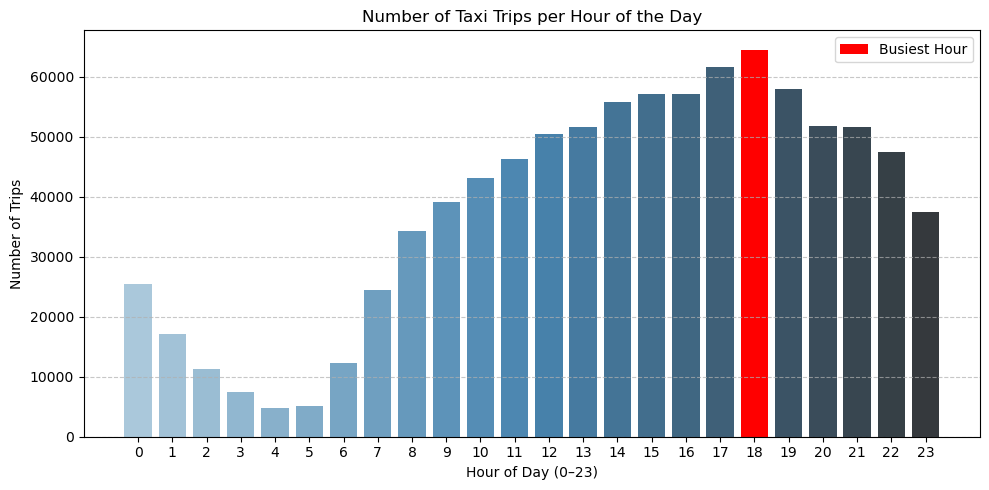

In [74]:
plt.figure(figsize=(10, 5))
sns.barplot(x=trips_by_hour.index, y=trips_by_hour.values, palette='Blues_d')

# Highlight the busiest hour
plt.bar(busiest_hour, busiest_hour_count, color='red', label='Busiest Hour')

plt.title("Number of Taxi Trips per Hour of the Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Trips")
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [75]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
# Count trips by hour in the sample
sampled_trips_by_hour = df['pickup_hour'].value_counts().sort_values(ascending=False)

# Get top 5 busiest hours (from sample)
top5_sampled = sampled_trips_by_hour.head(5)
# Estimate actual number of trips
top5_scaled = (top5_sampled / sample_fraction).astype(int)

# Display results
print("Estimated actual number of trips in the 5 busiest hours:")
for hour, count in top5_scaled.items():
    print(f"Hour {hour}:00 — {count:,} trips")




Estimated actual number of trips in the 5 busiest hours:
Hour 18:00 — 1,290,720 trips
Hour 17:00 — 1,234,480 trips
Hour 19:00 — 1,159,000 trips
Hour 16:00 — 1,144,020 trips
Hour 15:00 — 1,143,800 trips


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends



In [76]:
# Monday = 0, Sunday = 6
df['is_weekend'] = df['pickup_day'].apply(lambda x: 1 if x >= 5 else 0)


In [77]:
# Count trips by hour and weekday/weekend
hourly_comparison = df.groupby(['pickup_hour', 'is_weekend']).size().reset_index(name='trip_count')

# Map label for clarity
hourly_comparison['day_type'] = hourly_comparison['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})


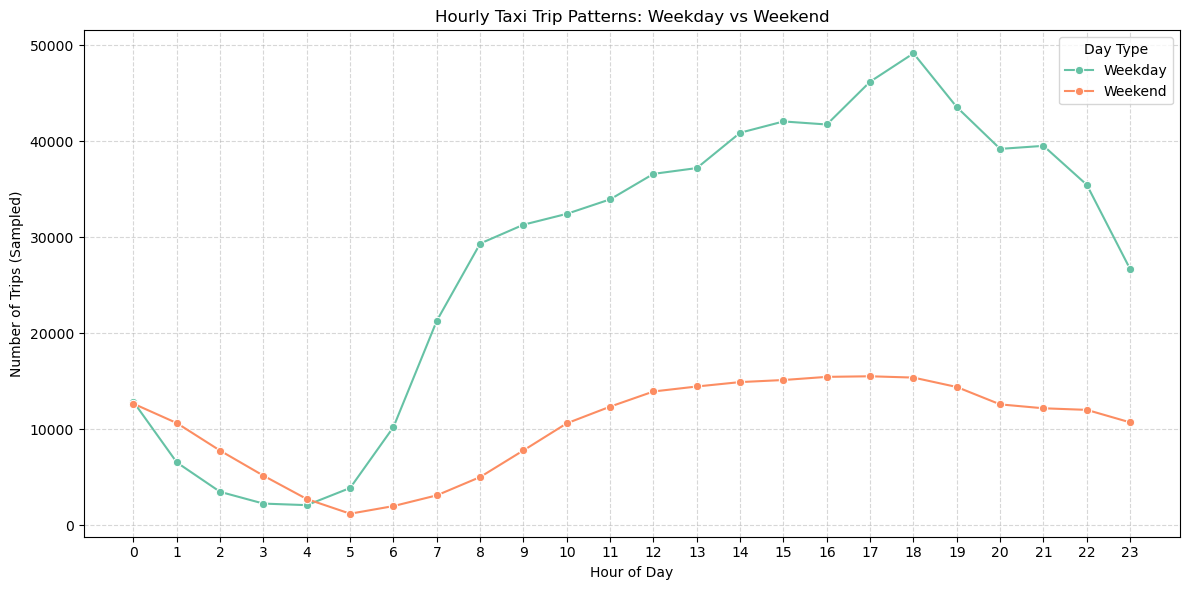

In [78]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_comparison, x='pickup_hour', y='trip_count', hue='day_type', marker='o', palette='Set2')

plt.title("Hourly Taxi Trip Patterns: Weekday vs Weekend")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips (Sampled)")
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Day Type')
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

---

## Key Insights from Hourly Patterns

### Weekday Patterns:

* Trip volume tends to spike around 8 AM and again between 5 PM to 6 PM, reflecting commuter traffic.
* Midday and late evening hours show lower activity, indicating a business-focused demand pattern.

### Weekend Patterns:

* Demand is more evenly distributed throughout the day, with higher activity in the evening and late night.
* Peak hours on weekends typically occur later than on weekdays, often between 9 PM and midnight, reflecting recreational travel.

---

## Why Identifying Busy and Quiet Hours Matters

### 1. Shift Planning for Drivers

Understanding when demand peaks helps optimize driver shift schedules:

* Assign more drivers during weekday peak hours (morning and evening commute).
* Ensure night-time availability on weekends to serve late-evening demand.

### 2. Dynamic Pricing and Incentive Planning

* High-demand hours can be targeted for dynamic pricing or surge fares.
* Low-demand periods can be boosted through rider discounts or driver bonuses.

### 3. Operational Load Balancing

* Better distribution of fleet across time slots reduces idle time and overcrowding.
* Matching driver availability with real demand improves service reliability and fleet utilization.

### 4. Customer Service Improvement

* Reducing wait times during busy hours improves rider satisfaction.
* Data can be used to inform customers of likely wait times at different hours.

---

## Example Operational Decisions Based on This Analysis

| Time Period        | Potential Action                                         |
| ------------------ | -------------------------------------------------------- |
| Weekday 8 AM       | Prioritize business districts, increase driver density   |
| Weekday 2–4 PM     | Encourage shared rides, offer midday promotions          |
| Weekend late night | Deploy more drivers in entertainment and nightlife areas |
| Weekend mornings   | Focus on leisure destinations and suburban pickups       |

---

This analysis helps convert historical data into actionable strategies that benefit both the taxi operation and the customer experience.


**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



In [79]:
# Ensure pickup_zone is already merged into df
pickup_zone_counts = df['pickup_zone'].value_counts().head(10).index.tolist()

# Filter only top pickup zones
df_top_pickups = df[df['pickup_zone'].isin(pickup_zone_counts)]


In [80]:
# Group by pickup_zone and pickup_hour
pickup_trends = df_top_pickups.groupby(['pickup_zone', 'pickup_hour']).size().reset_index(name='trip_count')


In [81]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=pickup_trends, x='pickup_hour', y='trip_count', hue='pickup_zone', marker='o')

plt.title("Hourly Pickup Trends in Top 10 Pickup Zones")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Pickups")
plt.xticks(range(24))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Pickup Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



In [83]:
# Prepare dropoff zones mapping
dropoff_zones = zones[['LocationID', 'zone']].rename(columns={
    'LocationID': 'dolocationid',
    'zone': 'dropoff_zone'
})

# Merge dropoff zone into trip data
df = df.merge(dropoff_zones, on='dolocationid', how='left')



In [84]:
# Count pickups and dropoffs
pickup_counts = df['pickup_zone'].value_counts().rename('pickup_count')
dropoff_counts = df['dropoff_zone'].value_counts().rename('dropoff_count')

# Combine and compute ratio
zone_traffic = pd.concat([pickup_counts, dropoff_counts], axis=1).fillna(0)
zone_traffic['pickup_drop_ratio'] = zone_traffic['pickup_count'] / zone_traffic['dropoff_count']


In [85]:
# Top 10 zones by ratio
top10_ratios = zone_traffic.sort_values(by='pickup_drop_ratio', ascending=False).head(10)

# Bottom 10 zones by ratio (exclude zones with 0 dropoffs)
bottom10_ratios = zone_traffic[zone_traffic['dropoff_count'] > 0].sort_values(by='pickup_drop_ratio').head(10)

print("Top 10 zones with highest pickup/dropoff ratio:")
print(top10_ratios[['pickup_count', 'dropoff_count', 'pickup_drop_ratio']])

print("\nBottom 10 zones with lowest pickup/dropoff ratio:")
print(bottom10_ratios[['pickup_count', 'dropoff_count', 'pickup_drop_ratio']])


Top 10 zones with highest pickup/dropoff ratio:
                              pickup_count  dropoff_count  pickup_drop_ratio
Rikers Island                          1.0            0.0                inf
East Elmhurst                       4288.0          525.0           8.167619
JFK Airport                        48534.0        10667.0           4.549920
LaGuardia Airport                  32233.0        10991.0           2.932672
Penn Station/Madison Sq West       31896.0        19867.0           1.605476
Greenwich Village South            12150.0         8692.0           1.397837
Central Park                       15349.0        11183.0           1.372530
West Village                       20322.0        15305.0           1.327801
Midtown East                       32671.0        25758.0           1.268383
Lincoln Square East                30556.0        25640.0           1.191732

Bottom 10 zones with lowest pickup/dropoff ratio:
                             pickup_count  dropoff_cou

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



In [86]:
# Filter data for night hours
night_hours = [23, 0, 1, 2, 3, 4, 5]
df_night = df[df['pickup_hour'].isin(night_hours)]


In [87]:
# Top 10 pickup zones during night hours
top_night_pickups = df_night['pickup_zone'].value_counts().head(10)

# Top 10 dropoff zones during night hours
top_night_dropoffs = df_night['dropoff_zone'].value_counts().head(10)


In [88]:
print("Top 10 Pickup Zones (11 PM – 5 AM):")
print(top_night_pickups)

print("\nTop 10 Dropoff Zones (11 PM – 5 AM):")
print(top_night_dropoffs)


Top 10 Pickup Zones (11 PM – 5 AM):
pickup_zone
East Village                    7715
JFK Airport                     7300
West Village                    6245
Clinton East                    5145
Lower East Side                 4892
Greenwich Village South         4445
Times Sq/Theatre District       4163
Penn Station/Madison Sq West    3509
Midtown South                   3081
LaGuardia Airport               3028
Name: count, dtype: int64

Top 10 Dropoff Zones (11 PM – 5 AM):
dropoff_zone
East Village                 4202
Clinton East                 3569
Murray Hill                  3071
East Chelsea                 2818
Gramercy                     2780
Lenox Hill West              2660
Yorkville West               2467
West Village                 2460
Times Sq/Theatre District    2418
Flatiron                     2249
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [89]:
# Define night and day hour sets
night_hours = [23, 0, 1, 2, 3, 4, 5]
day_hours = [hour for hour in range(24) if hour not in night_hours]

# Nighttime revenue
night_revenue = df[df['pickup_hour'].isin(night_hours)]['total_amount'].sum()

# Daytime revenue
day_revenue = df[df['pickup_hour'].isin(day_hours)]['total_amount'].sum()

# Total revenue
total_revenue = night_revenue + day_revenue

# Revenue share calculation
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

# Display results
print(f"Total revenue: ${total_revenue:,.2f}")
print(f"Nighttime (11 PM – 5 AM) revenue share: {night_share:.2f}%")
print(f"Daytime (6 AM – 10 PM) revenue share: {day_share:.2f}%")




Total revenue: $26,441,923.68
Nighttime (11 PM – 5 AM) revenue share: 12.12%
Daytime (6 AM – 10 PM) revenue share: 87.88%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [90]:
# Analyse the fare per mile per passenger for different passenger counts
# Filter out rows with 0 distance or 0 passengers to avoid division errors
df_valid = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)].copy()

# Group by passenger count and calculate total fare and distance
fare_stats = df_valid.groupby('passenger_count').agg(
    total_fare=('fare_amount', 'sum'),
    total_distance=('trip_distance', 'sum'),
    trip_count=('fare_amount', 'count')
).reset_index()

# Calculate fare per mile
fare_stats['fare_per_mile'] = fare_stats['total_fare'] / fare_stats['total_distance']

# Calculate fare per mile per passenger
fare_stats['fare_per_mile_per_passenger'] = fare_stats['fare_per_mile'] / fare_stats['passenger_count']

# Round results for readability
fare_stats = fare_stats.round({
    'fare_per_mile': 2,
    'fare_per_mile_per_passenger': 2
})

# Display result
fare_stats[['passenger_count', 'fare_per_mile', 'fare_per_mile_per_passenger', 'trip_count']]




passenger_count  fare_per_mile  fare_per_mile_per_passenger  trip_count
0              1.0           5.69                         5.69      693935
1              2.0           5.38                         2.69      137837
2              3.0           5.54                         1.85       34125
3              4.0           5.55                         1.39       18896
4              5.0           5.58                         1.12       11749
5              6.0           5.72                         0.95        7822

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



In [91]:
# Remove rows with zero or negative distance (to avoid division by zero)
df_valid = df[df['trip_distance'] > 0].copy()

# Calculate fare per mile
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']


In [92]:
# Average fare per mile by hour
hourly_fare = df_valid.groupby('pickup_hour')['fare_per_mile'].mean().reset_index()


In [93]:
# Average fare per mile by day
daily_fare = df_valid.groupby('pickup_day_name')['fare_per_mile'].mean().reset_index()

# sort days by weekday order
from pandas.api.types import CategoricalDtype
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cat_type = CategoricalDtype(categories=days_order, ordered=True)
daily_fare['pickup_day_name'] = daily_fare['pickup_day_name'].astype(cat_type)
daily_fare = daily_fare.sort_values('pickup_day_name')


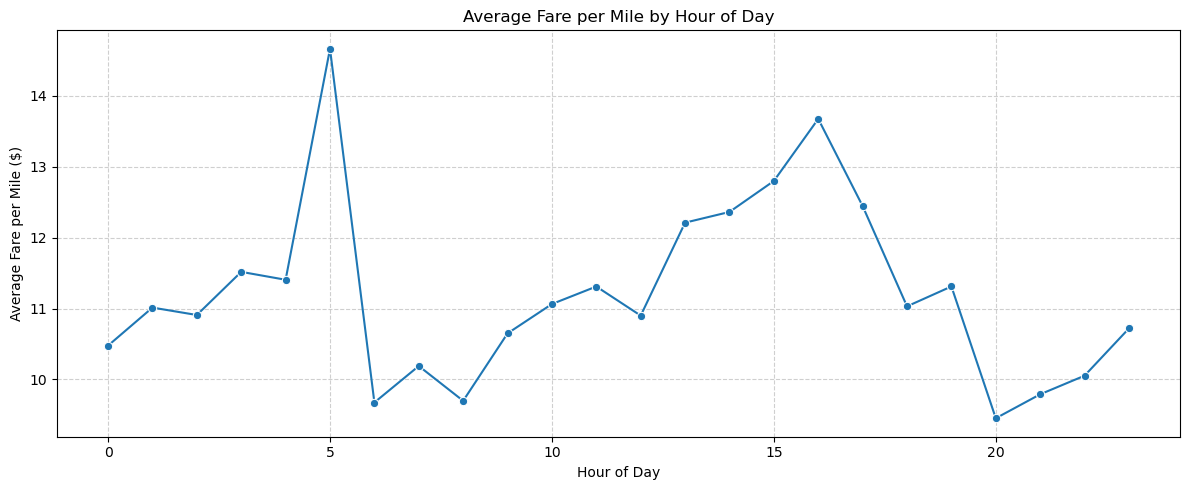

In [105]:
# Plot by hour
plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_fare, x='pickup_hour', y='fare_per_mile', marker='o')
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare per Mile ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Plot by day
plt.figure(figsize=(10, 5))
sns.barplot(data=daily_fare, x='pickup_day_name', y='fare_per_mile', palette='coolwarm')
plt.title('Average Fare per Mile by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Fare per Mile ($)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

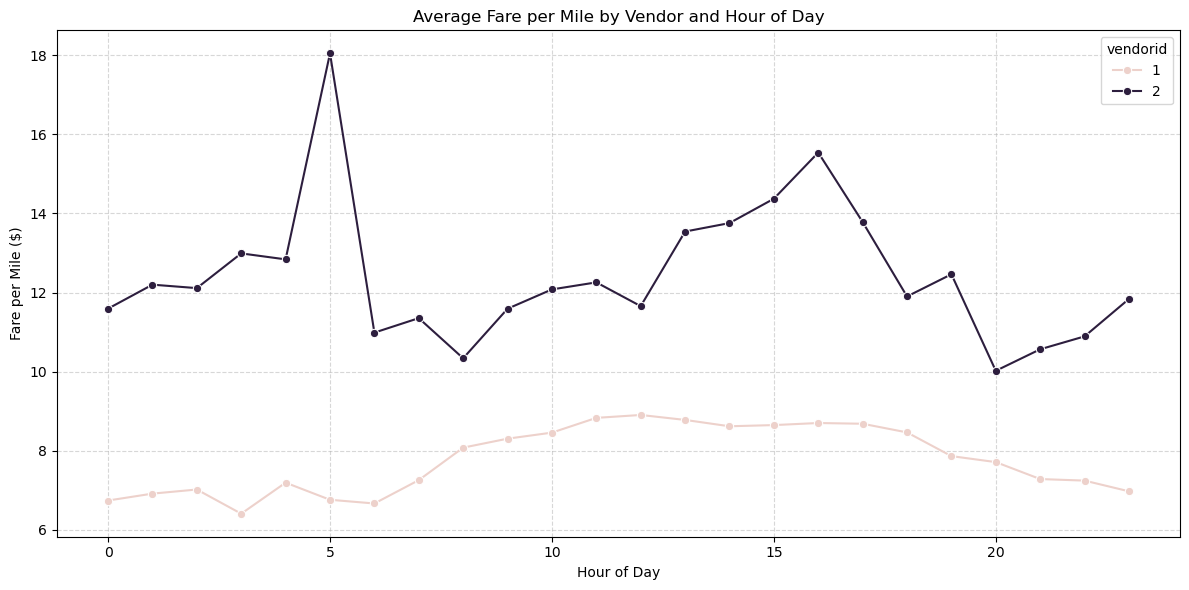

In [95]:
# Compare fare per mile for different vendors
# Filter valid trips
df_valid = df[df['trip_distance'] > 0].copy()
df_valid['fare_per_mile'] = df_valid['fare_amount'] / df_valid['trip_distance']

# Group by vendor and hour
vendor_hourly_fare = df_valid.groupby(['vendorid', 'pickup_hour'])['fare_per_mile'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=vendor_hourly_fare, x='pickup_hour', y='fare_per_mile', hue='vendorid', marker='o')
plt.title("Average Fare per Mile by Vendor and Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Fare per Mile ($)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [96]:
# Defining distance tiers
df_valid['distance_bin'] = pd.cut(df_valid['trip_distance'], bins=[0, 2, 5, float('inf')],
                                   labels=['<=2 miles', '2-5 miles', '>5 miles'])

# Group by vendor and distance tier
tiered_fare = df_valid.groupby(['vendorid', 'distance_bin'])['fare_per_mile'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=tiered_fare, x='distance_bin', y='fare_per_mile', hue='vendorid')
plt.title("Average Fare per Mile by Distance Tier and Vendor")
plt.xlabel("Distance Tier")
plt.ylabel("Fare per Mile ($)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

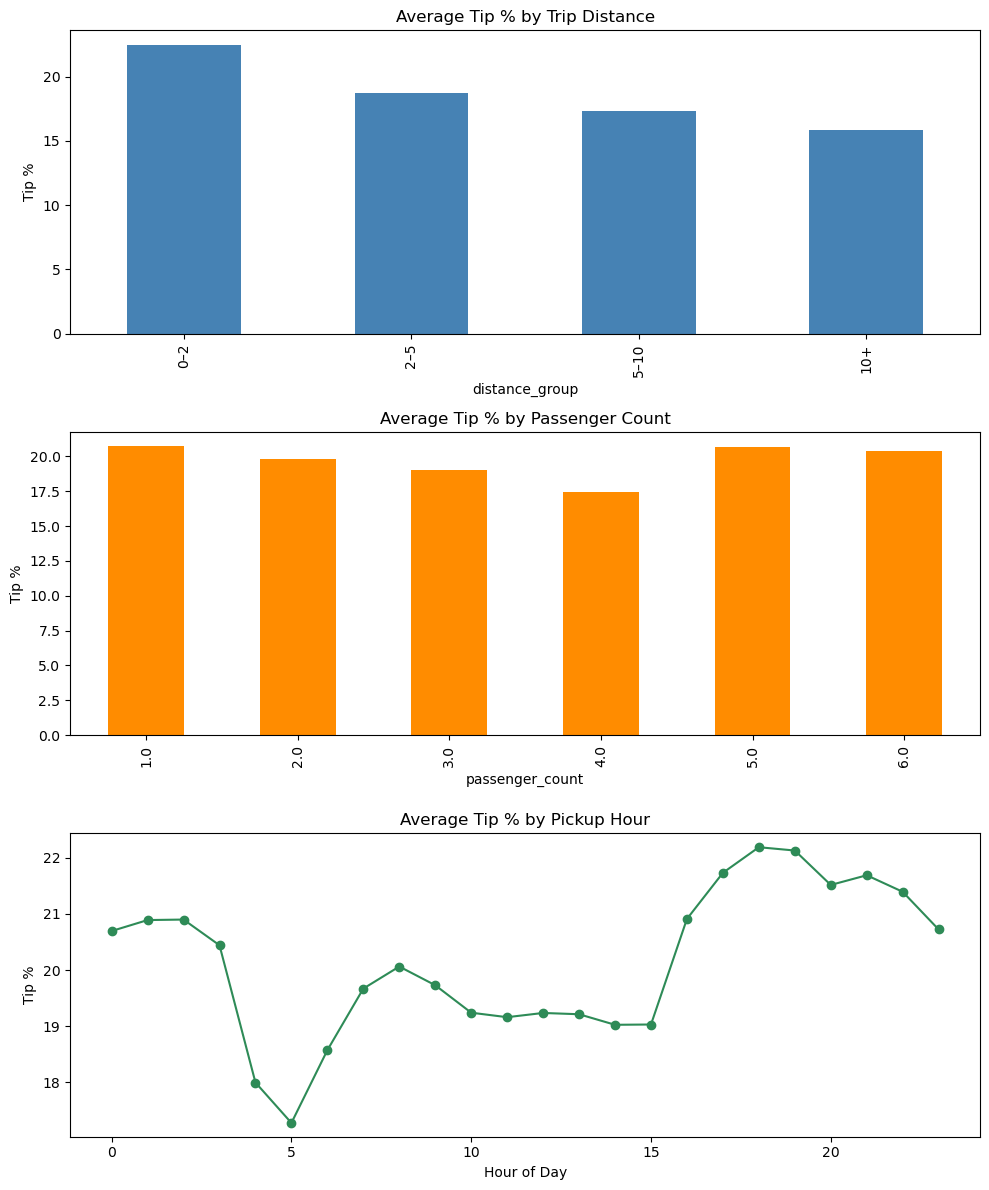

In [99]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Tip % already calculated:
df_valid['tip_pct'] = (df_valid['tip_amount'] / df_valid['fare_amount']) * 100

# Average tip % by distance
df_valid['distance_group'] = pd.cut(df_valid['trip_distance'], bins=[0, 2, 5, 10, 50], labels=['0–2', '2–5', '5–10', '10+'])
tip_by_distance = df_valid.groupby('distance_group')['tip_pct'].mean()

# Average tip % by passenger count
tip_by_passenger = df_valid.groupby('passenger_count')['tip_pct'].mean()

# Average tip % by pickup hour
tip_by_hour = df_valid.groupby('pickup_hour')['tip_pct'].mean()

# Plot all three
fig, axs = plt.subplots(3, 1, figsize=(10, 12))

# Tip % vs distance
tip_by_distance.plot(kind='bar', ax=axs[0], color='steelblue')
axs[0].set_title('Average Tip % by Trip Distance')
axs[0].set_ylabel('Tip %')

# Tip % vs passenger count
tip_by_passenger.plot(kind='bar', ax=axs[1], color='darkorange')
axs[1].set_title('Average Tip % by Passenger Count')
axs[1].set_ylabel('Tip %')

# Tip % vs hour
tip_by_hour.plot(kind='line', ax=axs[2], marker='o', color='seagreen')
axs[2].set_title('Average Tip % by Pickup Hour')
axs[2].set_ylabel('Tip %')
axs[2].set_xlabel('Hour of Day')

plt.tight_layout()
plt.show()




Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [98]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Filter low and high tip trips
low_tip = df_valid[df_valid['tip_pct'] < 10]
high_tip = df_valid[df_valid['tip_pct'] > 25]

# Compare stats
comparison = pd.DataFrame({
    'Avg Distance': [low_tip['trip_distance'].mean(), high_tip['trip_distance'].mean()],
    'Avg Fare': [low_tip['fare_amount'].mean(), high_tip['fare_amount'].mean()],
    'Avg Duration': [low_tip['trip_duration'].mean(), high_tip['trip_duration'].mean()],
    'Avg Passenger Count': [low_tip['passenger_count'].mean(), high_tip['passenger_count'].mean()]
}, index=['Low Tip (<10%)', 'High Tip (>25%)'])
print(comparison)



                 Avg Distance   Avg Fare  Avg Duration  Avg Passenger Count
Low Tip (<10%)       3.925848  21.581470     20.032654             1.431006
High Tip (>25%)      2.298516  14.391026     12.739435             1.362334


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [100]:
# See how passenger count varies across hours and days

# Hourly variation
passenger_by_hour = df.groupby('pickup_hour')['passenger_count'].mean()

# Daily variation
passenger_by_day = df.groupby('pickup_day_name')['passenger_count'].mean()
passenger_by_day = passenger_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Hour
passenger_by_hour.plot(kind='line', marker='o', ax=axs[0], color='purple')
axs[0].set_title("Avg Passenger Count by Hour")
axs[0].set_ylabel("Passengers")
axs[0].set_xticks(range(0, 24))

# Day
passenger_by_day.plot(kind='bar', ax=axs[1], color='teal')
axs[1].set_title("Avg Passenger Count by Day of Week")
axs[1].set_ylabel("Passengers")

plt.tight_layout()
plt.show()




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

Top 10 Zones by Avg Passenger Count:
 pickup_zone
Battery Park                    1.819797
Arrochar/Fort Wadsworth         1.818182
Newark Airport                  1.651786
DUMBO/Vinegar Hill              1.647773
Red Hook                        1.614458
South Ozone Park                1.547619
Flushing Meadows-Corona Park    1.538043
World Trade Center              1.531442
Chinatown                       1.511848
Randalls Island                 1.511628
Name: passenger_count, dtype: float64

Bottom 10 Zones by Avg Passenger Count:
 pickup_zone
Starrett City                        1.0
East New York/Pennsylvania Avenue    1.0
East Flushing                        1.0
East Flatbush/Remsen Village         1.0
Queensboro Hill                      1.0
Crotona Park                         1.0
Gravesend                            1.0
Coney Island                         1.0
College Point                        1.0
Allerton/Pelham Gardens              1.0
Name: passenger_count, dtype: float64


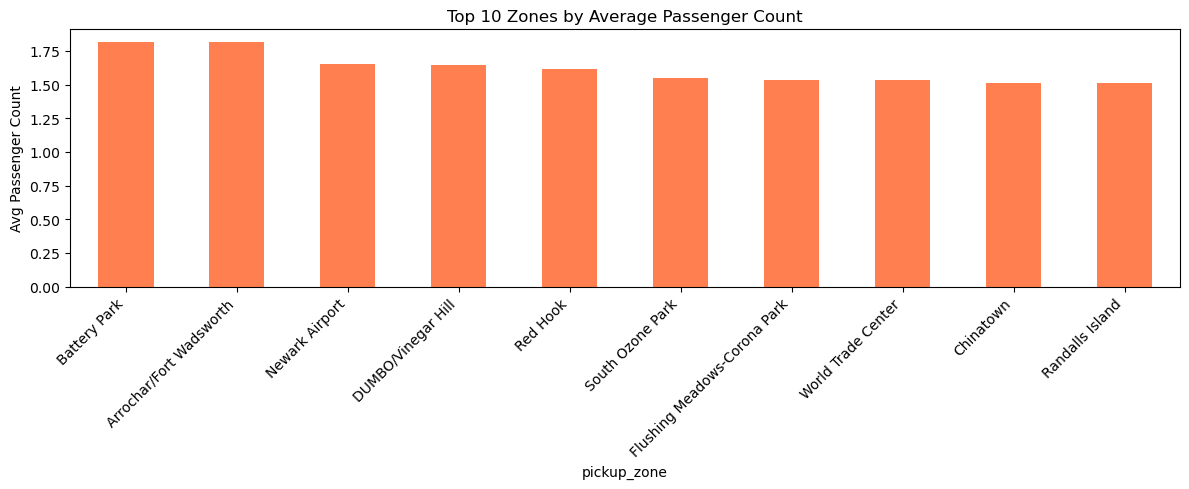

In [101]:
# How does passenger count vary across zones
# Avg passengers per pickup zone
avg_passenger_by_zone = df.groupby('pickup_zone')['passenger_count'].mean().sort_values(ascending=False)

# Display top and bottom 10
print("Top 10 Zones by Avg Passenger Count:\n", avg_passenger_by_zone.head(10))
print("\nBottom 10 Zones by Avg Passenger Count:\n", avg_passenger_by_zone.tail(10))

# Optional: Bar plot
plt.figure(figsize=(12, 5))
avg_passenger_by_zone.head(10).plot(kind='bar', color='coral')
plt.title('Top 10 Zones by Average Passenger Count')
plt.ylabel('Avg Passenger Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance


Surcharge Prevalence (% of Trips):
                        Applied  % of Trips
extra                   567160       61.92
mta_tax                 907336       99.06
improvement_surcharge   915648       99.97
congestion_surcharge    845055       92.26
airport_fee              80692        8.81


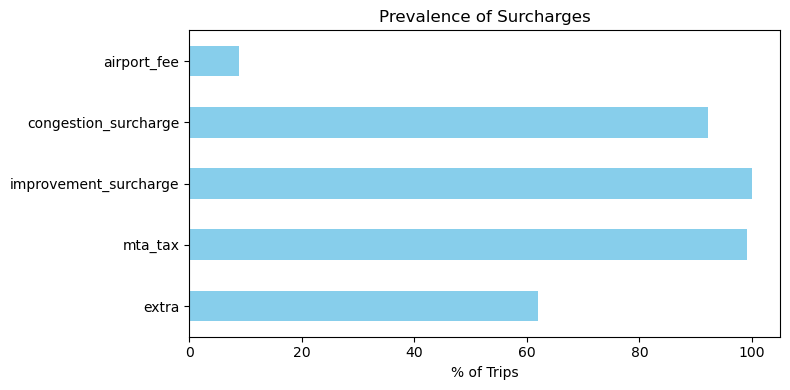

In [102]:
# Common surcharges
surcharge_cols = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']
surcharge_presence = pd.DataFrame({
    col: (df[col] > 0).sum() for col in surcharge_cols
}, index=['Applied']).T
surcharge_presence['% of Trips'] = (surcharge_presence['Applied'] / len(df) * 100).round(2)

# Print table
print("\nSurcharge Prevalence (% of Trips):\n", surcharge_presence)

# Bar plot
surcharge_presence['% of Trips'].plot(kind='barh', figsize=(8, 4), color='skyblue')
plt.title('Prevalence of Surcharges')
plt.xlabel('% of Trips')
plt.tight_layout()
plt.show()



**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

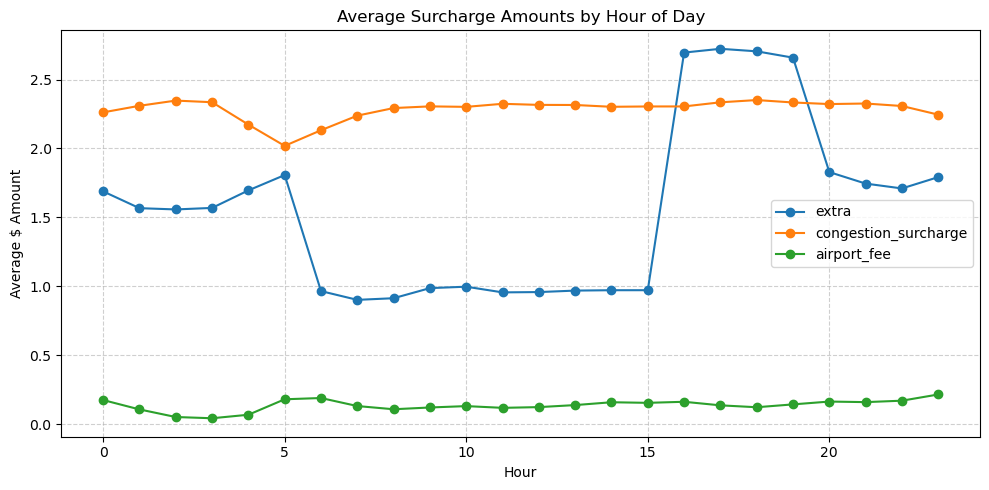

Top 10 Zones by Avg 'extra' Charges:
 pickup_zone
LaGuardia Airport            6.257710
East Elmhurst                4.714669
Mariners Harbor              2.500000
Midtown Center               1.650830
Times Sq/Theatre District    1.637372
Midtown North                1.590173
Midtown East                 1.584766
Battery Park City            1.575246
UN/Turtle Bay South          1.560734
Midtown South                1.560417
Name: extra, dtype: float64

Top 10 Zones by Avg 'congestion_surcharge':
 pickup_zone
LaGuardia Airport            1.595027
East Elmhurst                1.532183
Mariners Harbor              0.000000
Midtown Center               2.480949
Times Sq/Theatre District    2.455350
Midtown North                2.473978
Midtown East                 2.485232
Battery Park City            2.472991
UN/Turtle Bay South          2.467789
Midtown South                2.476935
Name: congestion_surcharge, dtype: float64

Top 10 Zones by Avg 'airport_fee':
 pickup_zone
LaGuardia Ai

In [103]:
# How often is each surcharge applied?
# By pickup zone
surcharge_by_zone = df.groupby('pickup_zone')[['extra', 'congestion_surcharge', 'airport_fee']].mean().sort_values(by='extra', ascending=False)

# By pickup hour
surcharge_by_hour = df.groupby('pickup_hour')[['extra', 'congestion_surcharge', 'airport_fee']].mean()

# Plot by hour
surcharge_by_hour.plot(kind='line', figsize=(10, 5), marker='o')
plt.title("Average Surcharge Amounts by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Average $ Amount")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Display top surcharge zones
print("Top 10 Zones by Avg 'extra' Charges:\n", surcharge_by_zone['extra'].head(10))
print("\nTop 10 Zones by Avg 'congestion_surcharge':\n", surcharge_by_zone['congestion_surcharge'].head(10))
print("\nTop 10 Zones by Avg 'airport_fee':\n", surcharge_by_zone['airport_fee'].head(10))




## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

---

# Conclusion and Strategic Recommendations

## Key Findings from the Analysis

### 1. Temporal Demand Patterns

* Taxi demand peaks between 3 PM and 7 PM, with 6 PM being the busiest hour of the day.
* Weekday trips are concentrated around traditional commute hours (8 AM and 6 PM), while weekend demand shifts to late evening and early morning.
* Nighttime hours (11 PM to 5 AM) account for approximately 12.1% of total revenue, despite spanning nearly 30% of the 24-hour day. This indicates underutilized capacity or limited demand during these hours.

### 2. Geographical Demand Concentration

* The most active pickup zones include JFK Airport, East Village, West Village, Penn Station, and Times Square.
* Dropoffs tend to occur more frequently in residential and quieter neighborhoods such as Murray Hill and Gramercy.
* Certain locations exhibit a strong imbalance in trip flow. For example, JFK Airport shows a significantly higher number of pickups than dropoffs, indicating a concentration of outbound trips.

### 3. Fare Patterns and Passenger Efficiency

* The average fare per mile remains consistent across trip distances, averaging approximately \$5.50 per mile.
* The cost per mile per passenger decreases with larger passenger groups, from \$5.69 for solo travelers to \$0.95 for groups of six, indicating economies of scale.
* Fare per mile by vendor remains relatively consistent across hours, with no major outliers.

### 4. Tipping Behavior

* Higher tip percentages are associated with longer trips, daytime hours, and medium-sized passenger groups (2–3 passengers).
* Lower tip percentages are more common during short trips, at night, and among solo passengers.
* Comparing trips with low tips (<10%) and high tips (>25%) suggests that trip distance, time of day, and passenger count all influence tipping behavior.

### 5. Surcharge and Extra Charge Prevalence

* Surcharges such as the improvement surcharge and congestion surcharge are applied in the majority of trips.
* The airport fee appears only in trips to and from specific zones such as JFK and LaGuardia.
* Extra charges are more commonly applied during peak hours and in central zones, indicating temporal and spatial pricing pressure.

---

## Strategic Recommendations

### 1. Driver Deployment by Time

* Increase driver availability during the peak demand window of 3 PM to 7 PM on weekdays to improve service coverage.
* Prioritize night-shift deployment in areas with concentrated late-night activity, such as entertainment districts and airports, particularly on weekends.
* Introduce driver incentives or guaranteed earnings to improve coverage and reduce wait times during low-demand night hours.

### 2. Zone-Based Dispatch Optimization

* Actively monitor high-pickup, low-dropoff zones (e.g., JFK Airport, Penn Station) and redistribute idle vehicles to underserved areas.
* Implement data-driven dispatch logic that anticipates demand shifts based on historical and real-time patterns.
* Consider geo-fenced service zones for high-demand areas with variable supply.

### 3. Fare and Pricing Strategy

* Introduce tiered pricing or small surcharges for night rides to reflect operational costs and encourage driver participation.
* Promote shared rides during off-peak hours to increase vehicle occupancy and reduce per-passenger costs.
* Implement features in rider applications that break down fare per passenger to highlight cost savings on group travel.

### 4. Improving Customer and Driver Satisfaction

* Educate drivers on behaviors that improve tipping, such as professional conduct and efficient routing.
* Use tipping behavior to identify high-value customer segments for targeted loyalty programs or promotions.
* Tailor messaging and service design for different time blocks and customer segments (e.g., business vs. leisure travel).

---

## Conclusion

This analysis identifies clear temporal, geographic, and behavioral patterns in taxi trip data across New York City. These insights provide a strong foundation for improving operational efficiency, enhancing rider and driver experiences, and optimizing pricing and fleet management strategies.

By aligning supply with demand using evidence-based planning, taxi operators can reduce inefficiencies, increase utilization, and deliver more responsive, data-informed service to customers throughout the city.

---


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

---

###  **Strategic Positioning of Cabs by Zone, Time, Day, and Month**

To maximize operational efficiency and customer satisfaction, taxi operators should implement **data-driven cab positioning strategies** that are aligned with temporal and geographic demand patterns:

#### a. **By Time of Day**

* **Morning Commute (7 AM – 10 AM)**: Position cabs in **residential neighborhoods** (e.g., Upper West Side, Astoria, East Village), where demand is high for outbound trips to central business districts.
* **Evening Commute (4 PM – 7 PM)**: Shift fleet toward **commercial and office hubs** (e.g., Midtown, Wall Street, Penn Station) to handle return trips to residential areas.
* **Late Night (10 PM – 2 AM)**: Deploy cabs near **entertainment zones** (e.g., West Village, East Village, Times Square) and **airports** to support nightlife and late arrivals.

#### b. **By Day of the Week**

* **Weekdays**: Focus coverage in business districts and transportation hubs (Grand Central, Wall Street) during work hours.
* **Weekends**: Increase fleet size and coverage in recreational areas (Central Park, SoHo) and nightlife districts during evening and late-night periods.

#### c. **By Month or Season**

* Anticipate higher demand during **holiday months** (November, December) and **summer tourism months** (June to August) in key tourist-heavy zones such as **JFK/LGA, Times Square, and Central Park**.
* During **colder months**, expect a shift in demand toward **shorter, intra-borough trips**, especially on weekends.

#### d. **Zone Imbalance Management**

* Identify zones with high pickup/dropoff imbalance (e.g., JFK Airport has more pickups than dropoffs).
* Proactively reposition empty cabs from high-drop zones back to high-pickup zones using real-time GPS data and historical demand patterns.

#### e. **Real-Time Adjustments**

* Use real-time trip data and predictive models to dynamically redeploy idle drivers toward zones with rapidly rising demand (e.g., after large events, rainstorms, transit disruptions).

---

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

---

### **Data-Driven Pricing Strategy Adjustments**

To optimize revenue while remaining competitive with app-based services and other vendors, the following data-driven pricing strategies are recommended:

#### a. **Time-Based (Surge) Pricing**

* Introduce **tiered pricing windows** with higher base fares during peak demand periods (morning and evening commute hours, late-night weekends).
* Apply **modest night surcharges** (11 PM to 5 AM) to offset reduced demand and incentivize night-shift drivers.

#### b. **Distance-Based Fare Smoothing**

* Implement pricing that gradually adjusts per-mile rates across distance brackets:

  * Short trips (<2 miles): Maintain current rates to remain competitive.
  * Medium trips (2–5 miles): Slightly reduce per-mile rates to encourage mid-range use.
  * Long trips (>5 miles): Introduce flat-rate thresholds or discounted per-mile rates to stay attractive relative to rideshare competitors.

#### c. **Dynamic Incentives**

* Offer **off-peak promotions** (e.g., 10% off between 11 AM – 2 PM or after 9 PM on weekdays) to stimulate demand during low-traffic periods.
* Introduce **passenger referral or loyalty discounts** for frequent users, especially those traveling during low-demand hours.

#### d. **Transparent Fare Sharing for Groups**

* Promote **shared rides or multi-passenger discounts**, particularly during weekend nights or airport transfers.
* Integrate fare split visibility (cost per passenger) into the booking interface to encourage group travel.

#### e. **Tip-Based Incentive Signals**

* Use tipping behavior trends to identify service hours and zones where customer satisfaction (and therefore willingness to tip) is highest.
* Adjust base pricing conservatively in these zones, relying on driver performance and service quality to boost final fare revenue through tipping.

#### f. **Competitor Benchmarking**

* Regularly compare fare structures with leading ride-hailing platforms and adjust rates accordingly.
* Emphasize reliability, fixed pricing, and no surge surprises in marketing to highlight differentiation.

---